In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import numpy as np

import os
%matplotlib inline

#PWD = '/srv/home/zhenlin4/gitRes/deepsz2/SB_cosmo/'
#if PWD not in sys.path: sys.path.append(PWD)

In [2]:
def read_data(fname="MF_true_0910_norm.txt", dir_name = "/srv/home/zhenlin4/gitRes/deepszUQ/deepsz2/SB_cosmo"):
    fpath = os.path.join(dir_name, fname)
    with open(fpath, 'r') as fi:
        append = False
        ret = []
        for l in fi.readlines():
            #print(l)
            if l.startswith('## END_OF_PRIORS_INI'):
                append = True
                continue
            if l.startswith("#nsample"): 
                append = False
            if append:
                ret.append(l)
    ret = [list(map(float, l.split())) for l in ret]
    return pd.DataFrame(ret).rename(columns={0:"Omega_m", 1:"sigma_8"})

In [3]:
df_nonorm_noerr = read_data('MF_true_0910_noerr.txt')
chains = {"M_err=0": df_nonorm_noerr}
chains = {k: v.reindex(columns=['Omega_m','sigma_8']).values for k, v in chains.items()}

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


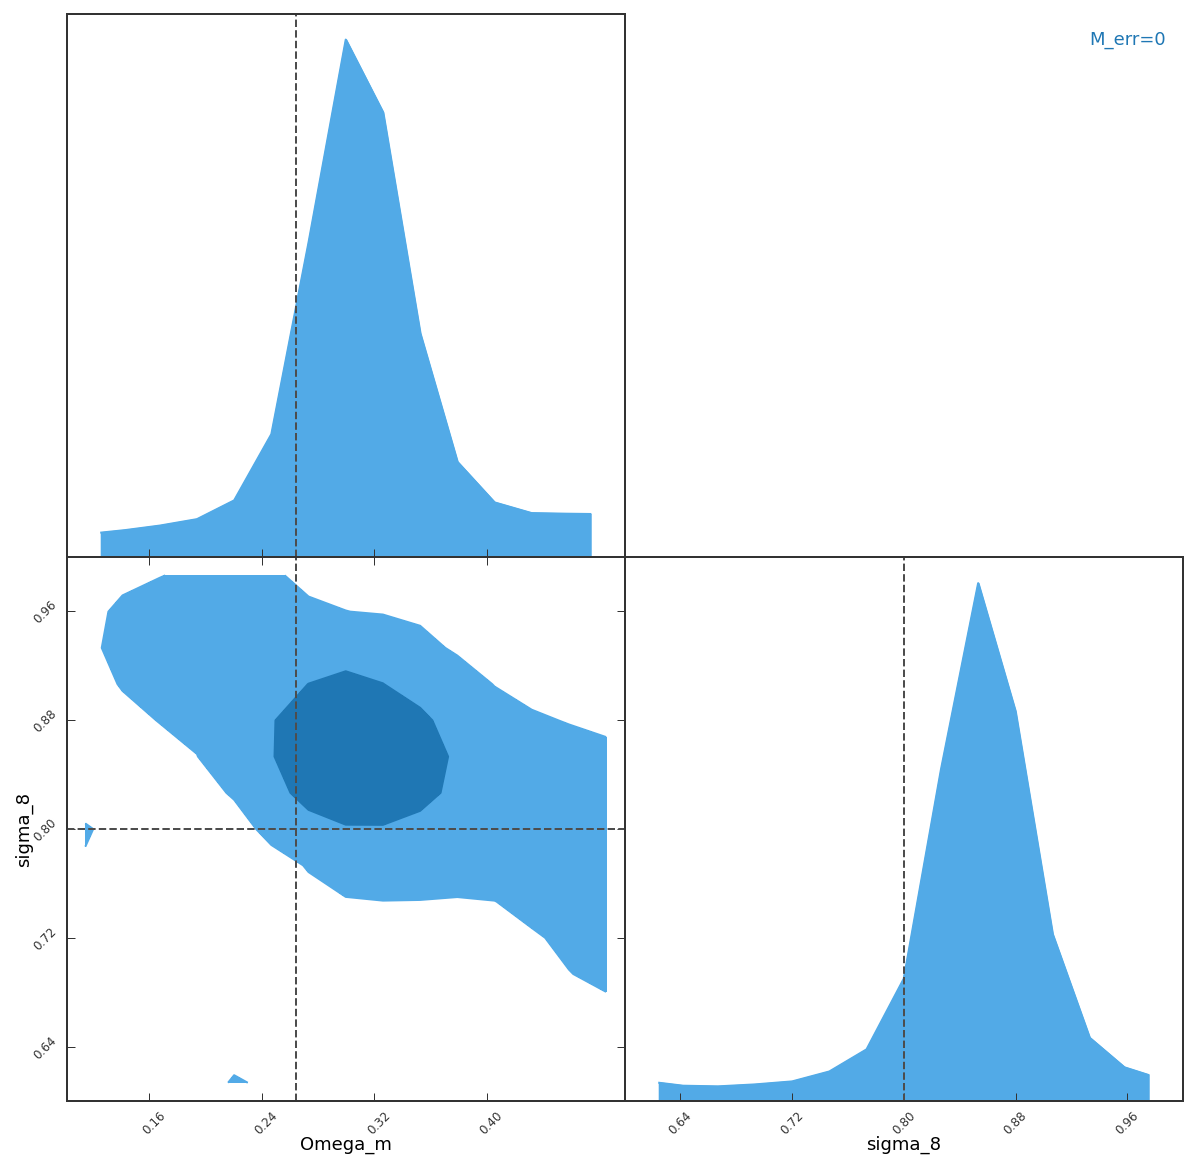

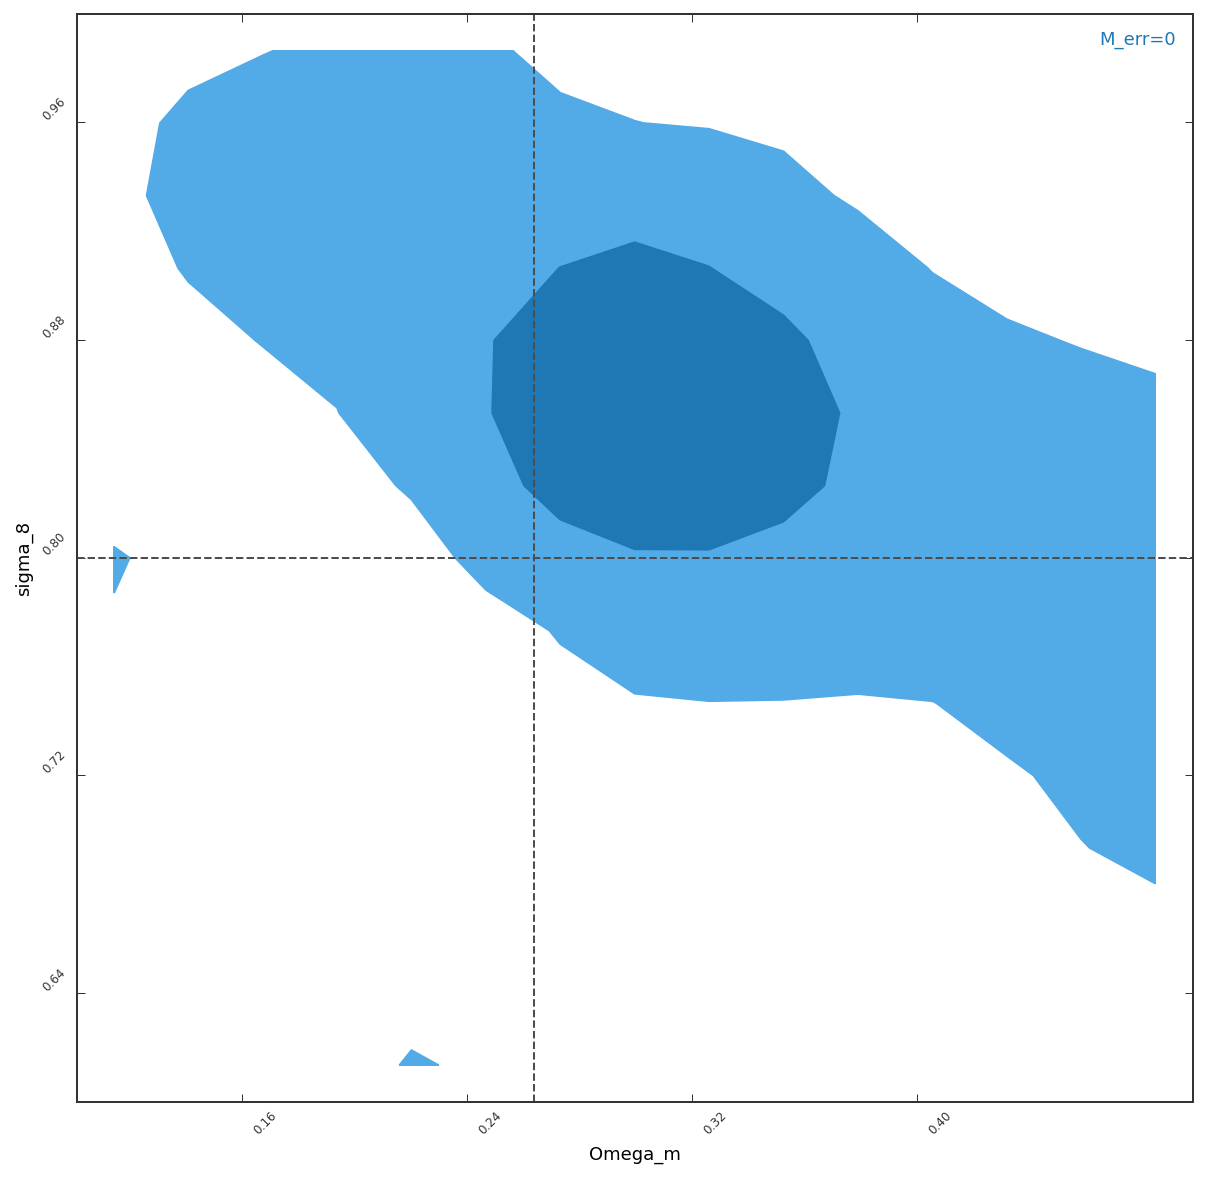

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For mac users with Retina display
from matplotlib import pyplot as plt
import numpy as np
import pygtc
#https://pygtc.readthedocs.io/en/latest/demo.html
# Redefine priors and truths
priors2d = (None,(1,1))
#truths2d = (0,None)
truths2d = (0.264, 0.8)
kwargs = {"chains": [chains[k] for k in chains.keys()], "nBins":15, "paramNames":['Omega_m', 'sigma_8'],
         "chainLabels": list(chains.keys()),
          'truths': truths2d, 'figureSize': 10
         }

# The 2d panel and the 1d histograms
GTC = pygtc.plotGTC(#truths=truths2d,
                    #truthLabels=truthLabels[0],
                    #priors=priors2d,
                    #figureSize='MNRAS_column', 
    **kwargs)

# Only the 2d panel
Range2d = ((-3,5),(-3,7)) # To make sure there's enough space for the legend

GTC = pygtc.plotGTC(
                    #truths=truths2d,
                    #truthLabels=truthLabels[0],
                    #priors=priors2d,
                    #paramRanges=Range2d,
                    #figureSize='MNRAS_column',
                    do1dPlots=False,  **kwargs)